# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define your API key
api_key = "314d4eb140548670403de8544c3679a5"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out needed fields
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid hitting rate limits
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | kolin
Processing Record 4 of Set 1 | mbandjok
Processing Record 5 of Set 1 | fereydun kenar
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | kyzyl-kyya
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | quiindy
Processing Record 10 of Set 1 | ciudad lazaro cardenas
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | ad dabbah
Processing Record 14 of Set 1 | jimo
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of S

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,15.10,88,100,15.22,NZ,1747521044
1,port elizabeth,-33.9180,25.5701,19.62,99,71,1.34,ZA,1747521045
2,kolin,50.0281,15.2006,7.91,87,100,3.13,CZ,1747521046
3,mbandjok,4.4500,11.9000,21.03,98,100,0.42,CM,1747521047
4,fereydun kenar,36.6864,52.5225,17.28,83,0,3.75,IR,1747521048


In [11]:
import os

# Ensure the directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Now export the City_Data into a CSV
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.10,88,100,15.22,NZ,1747521044
1,port elizabeth,-33.9180,25.5701,19.62,99,71,1.34,ZA,1747521045
2,kolin,50.0281,15.2006,7.91,87,100,3.13,CZ,1747521046
3,mbandjok,4.4500,11.9000,21.03,98,100,0.42,CM,1747521047
4,fereydun kenar,36.6864,52.5225,17.28,83,0,3.75,IR,1747521048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

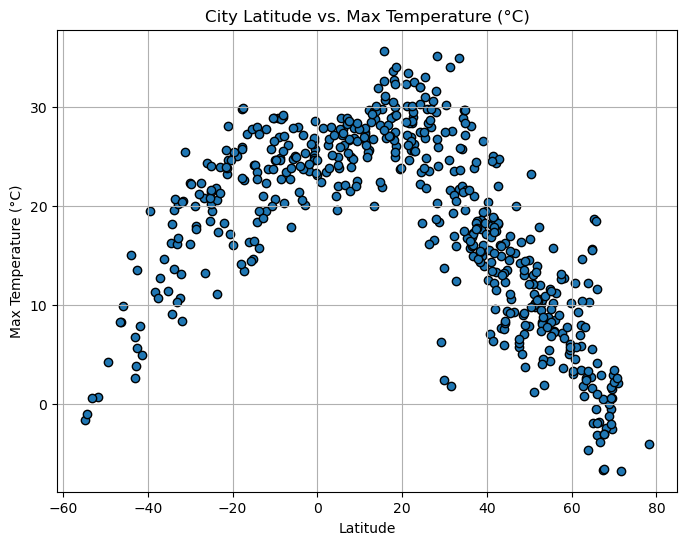

<Figure size 640x480 with 0 Axes>

In [14]:
# Latitude vs. Max Temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

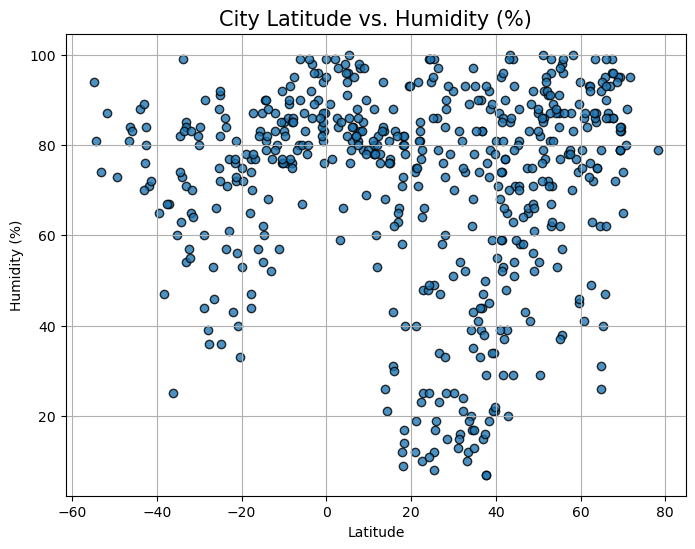

<Figure size 640x480 with 0 Axes>

In [15]:
# Latitude vs. Humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Humidity (%)", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

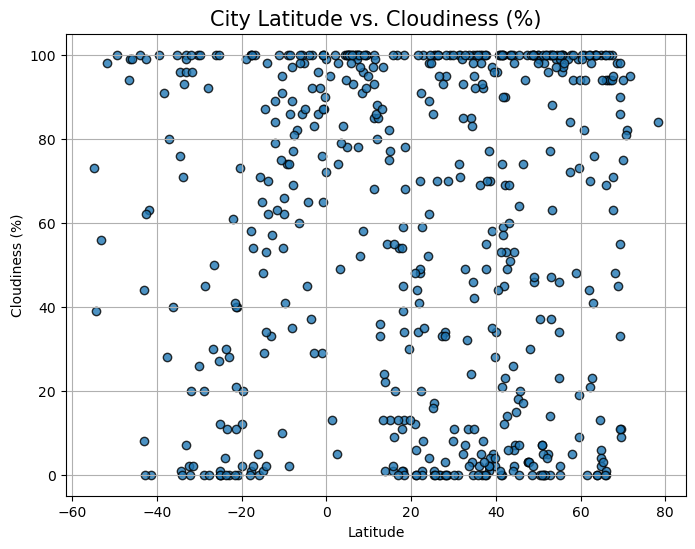

<Figure size 640x480 with 0 Axes>

In [16]:
# Latitude vs. Cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Cloudiness (%)", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

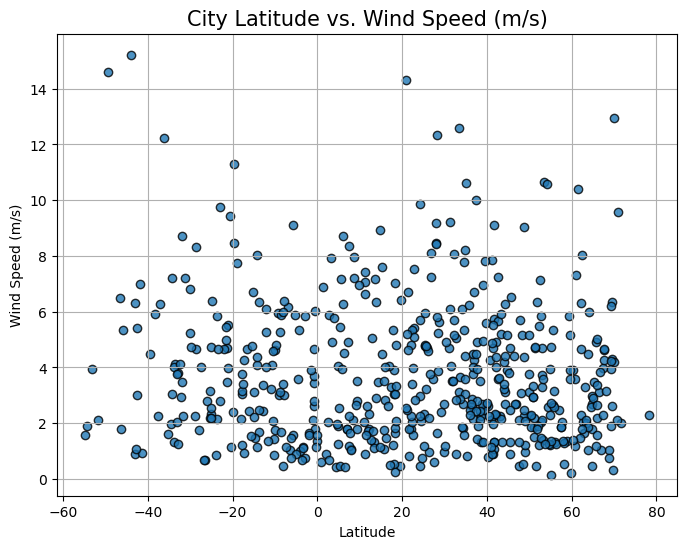

<Figure size 640x480 with 0 Axes>

In [17]:
# Latitude vs. Wind Speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x, y, hemisphere, y_label, filename=None):
    """
    Create a scatter plot with linear regression line, formula, and R² value.

    Parameters:
    - x: The independent variable (e.g., Latitude)
    - y: The dependent variable (e.g., Temperature, Humidity, etc.)
    - hemisphere: 'Northern' or 'Southern' (used in the title)
    - y_label: Label for the y-axis
    - filename: Optional. Save the figure to file if provided (e.g., 'northern_temp.png')
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, edgecolor="black", linewidths=1, alpha=0.8)
    plt.plot(x, regress_values, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere: Latitude vs. {y_label}", fontsize=14)
    plt.annotate(line_eq, (x.min()+2, y.min()+2), fontsize=12, color="red")
    plt.grid(True)

    # Show R-squared
    print(f"{hemisphere} Hemisphere - r² = {rvalue**2:.4f}")

    # Save plot if filename provided
    if filename:
        plt.savefig(filename)

    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kolin,50.0281,15.2006,7.91,87,100,3.13,CZ,1747521046
3,mbandjok,4.4500,11.9000,21.03,98,100,0.42,CM,1747521047
4,fereydun kenar,36.6864,52.5225,17.28,83,0,3.75,IR,1747521048
6,kyzyl-kyya,40.2568,72.1279,20.41,55,96,2.60,KG,1747521050
7,taoudenni,22.6783,-3.9836,32.48,10,59,5.43,ML,1747521051


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.10,88,100,15.22,NZ,1747521044
1,port elizabeth,-33.9180,25.5701,19.62,99,71,1.34,ZA,1747521045
5,codrington,-38.2667,141.9667,11.28,47,91,5.91,AU,1747521049
8,quiindy,-25.9667,-57.2667,24.38,66,100,2.81,PY,1747521052
14,puerto natales,-51.7236,-72.4875,0.75,87,98,2.10,CL,1747521060


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere - r² = 0.7205


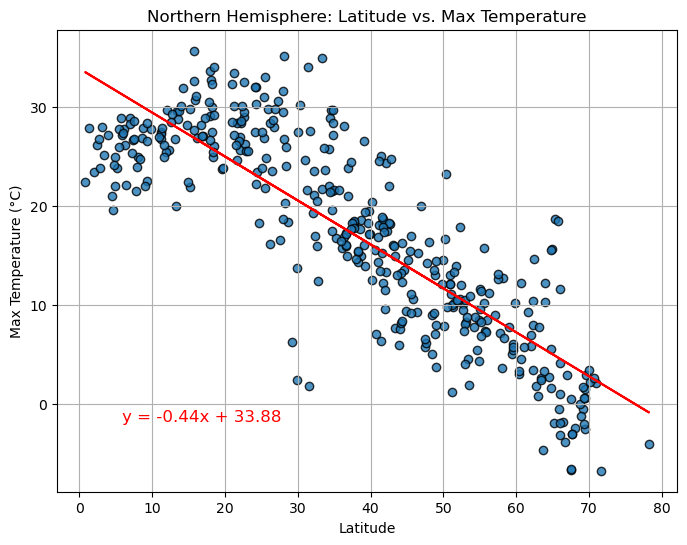

In [21]:
# Linear regression on Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere data (Latitude vs Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create the linear regression line values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data and the regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values, regress_values, color="red")

# Add the linear regression equation and R-squared value
plt.annotate(line_eq, (x_values.min() + 5, y_values.min() + 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.grid(True)

# Show the R-squared value in the console
print(f"Northern Hemisphere - r² = {r_value**2:.4f}")

# Show the plot
plt.show()


Southern Hemisphere - r² = 0.6178


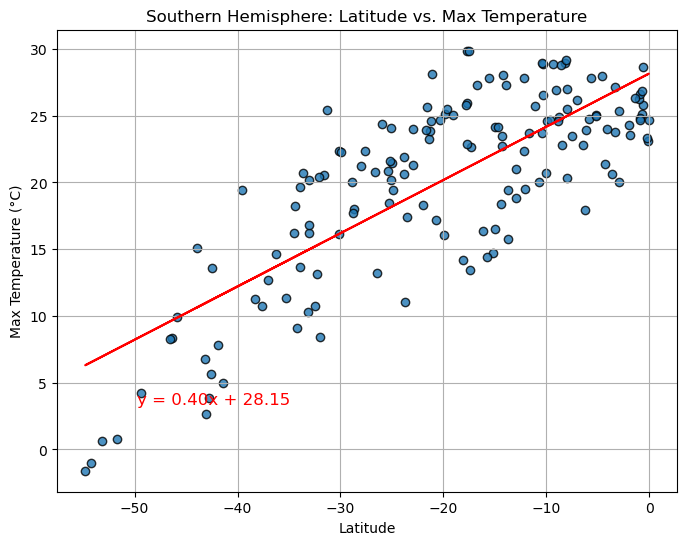

In [22]:
# Linear regression on Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Southern Hemisphere data (Latitude vs Max Temp)
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope_south, intercept_south, r_value_south, p_value_south, std_err_south) = linregress(x_values_south, y_values_south)

# Create the linear regression line values for the Southern Hemisphere
regress_values_south = slope_south * x_values_south + intercept_south
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}"

# Plot the data and the regression line for Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_south, y_values_south, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_south, regress_values_south, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_south, (x_values_south.min() + 5, y_values_south.min() + 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.grid(True)

# Show the R-squared value in the console for the Southern Hemisphere
print(f"Southern Hemisphere - r² = {r_value_south**2:.4f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere - r² = 0.0109


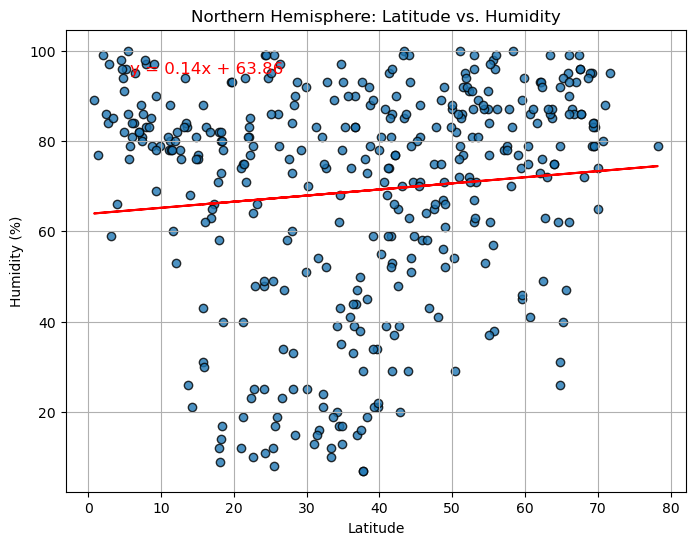

In [23]:
# Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere data (Latitude vs Humidity)
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Humidity"]

# Perform linear regression
(slope_north, intercept_north, r_value_north, p_value_north, std_err_north) = linregress(x_values_north, y_values_north)

# Create the linear regression line values for the Northern Hemisphere
regress_values_north = slope_north * x_values_north + intercept_north
line_eq_north = f"y = {slope_north:.2f}x + {intercept_north:.2f}"

# Plot the data and the regression line for Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_north, y_values_north, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_north, regress_values_north, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_north, (x_values_north.min() + 5, y_values_north.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.grid(True)

# Show the R-squared value in the console for Northern Hemisphere
print(f"Northern Hemisphere - r² = {r_value_north**2:.4f}")

# Show the plot
plt.show()


Southern Hemisphere - r² = 0.0818


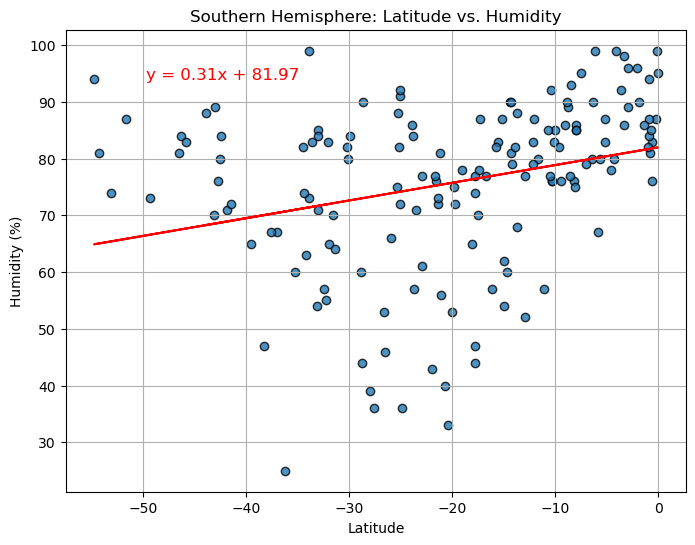

In [24]:
# Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Southern Hemisphere data (Latitude vs Humidity)
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]

# Perform linear regression
(slope_south, intercept_south, r_value_south, p_value_south, std_err_south) = linregress(x_values_south, y_values_south)

# Create the linear regression line values for the Southern Hemisphere
regress_values_south = slope_south * x_values_south + intercept_south
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}"

# Plot the data and the regression line for Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_south, y_values_south, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_south, regress_values_south, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_south, (x_values_south.min() + 5, y_values_south.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.grid(True)

# Show the R-squared value in the console for Southern Hemisphere
print(f"Southern Hemisphere - r² = {r_value_south**2:.4f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere - r² = 0.0008


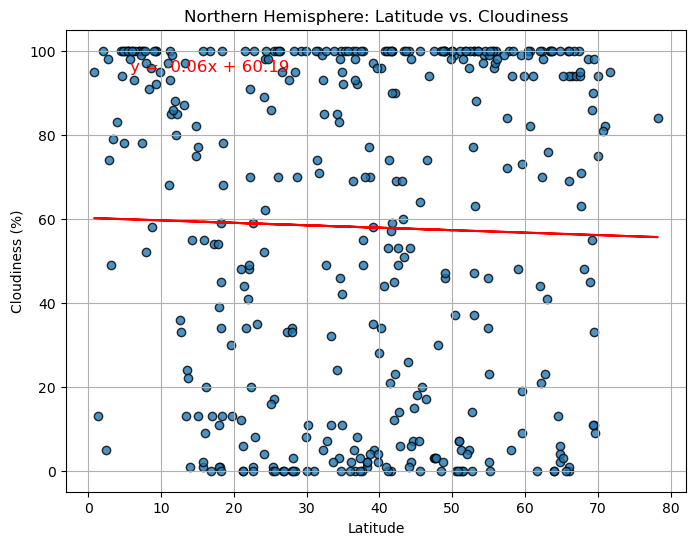

In [25]:
# Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere data (Latitude vs Cloudiness)
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope_north, intercept_north, r_value_north, p_value_north, std_err_north) = linregress(x_values_north, y_values_north)

# Create the linear regression line values for the Northern Hemisphere
regress_values_north = slope_north * x_values_north + intercept_north
line_eq_north = f"y = {slope_north:.2f}x + {intercept_north:.2f}"

# Plot the data and the regression line for Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_north, y_values_north, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_north, regress_values_north, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_north, (x_values_north.min() + 5, y_values_north.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.grid(True)

# Show the R-squared value in the console for Northern Hemisphere
print(f"Northern Hemisphere - r² = {r_value_north**2:.4f}")

# Show the plot
plt.show()


Southern Hemisphere - r² = 0.0285


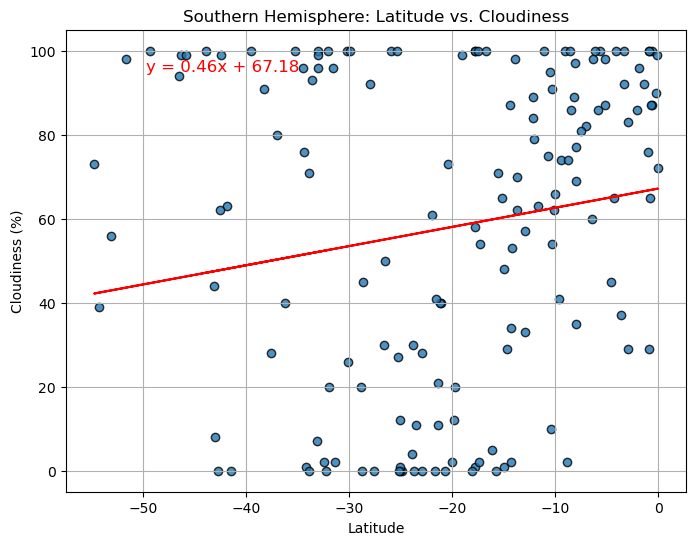

In [26]:
# Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Southern Hemisphere data (Latitude vs Cloudiness)
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope_south, intercept_south, r_value_south, p_value_south, std_err_south) = linregress(x_values_south, y_values_south)

# Create the linear regression line values for the Southern Hemisphere
regress_values_south = slope_south * x_values_south + intercept_south
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}"

# Plot the data and the regression line for Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_south, y_values_south, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_south, regress_values_south, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_south, (x_values_south.min() + 5, y_values_south.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.grid(True)

# Show the R-squared value in the console for Southern Hemisphere
print(f"Southern Hemisphere - r² = {r_value_south**2:.4f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere - r² = 0.0037


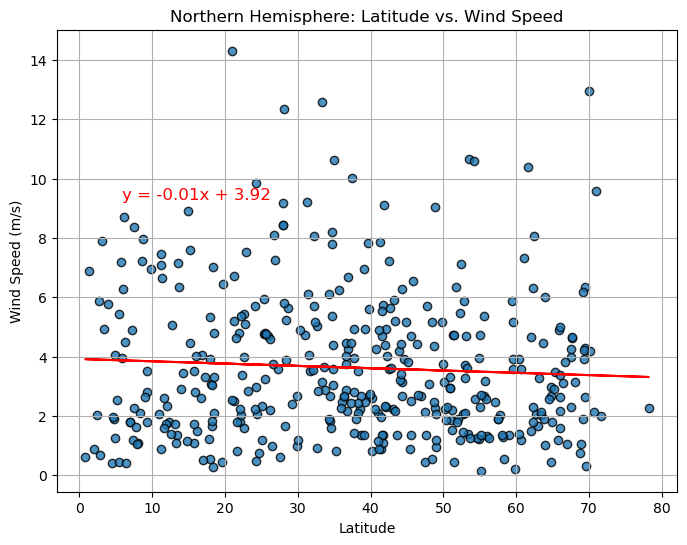

In [27]:
# Northern Hemisphere
# # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere data (Latitude vs Wind Speed)
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope_north, intercept_north, r_value_north, p_value_north, std_err_north) = linregress(x_values_north, y_values_north)

# Create the linear regression line values for the Northern Hemisphere
regress_values_north = slope_north * x_values_north + intercept_north
line_eq_north = f"y = {slope_north:.2f}x + {intercept_north:.2f}"

# Plot the data and the regression line for Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_north, y_values_north, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_north, regress_values_north, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_north, (x_values_north.min() + 5, y_values_north.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.grid(True)

# Show the R-squared value in the console for Northern Hemisphere
print(f"Northern Hemisphere - r² = {r_value_north**2:.4f}")

# Show the plot
plt.show()


Southern Hemisphere - r² = 0.0468


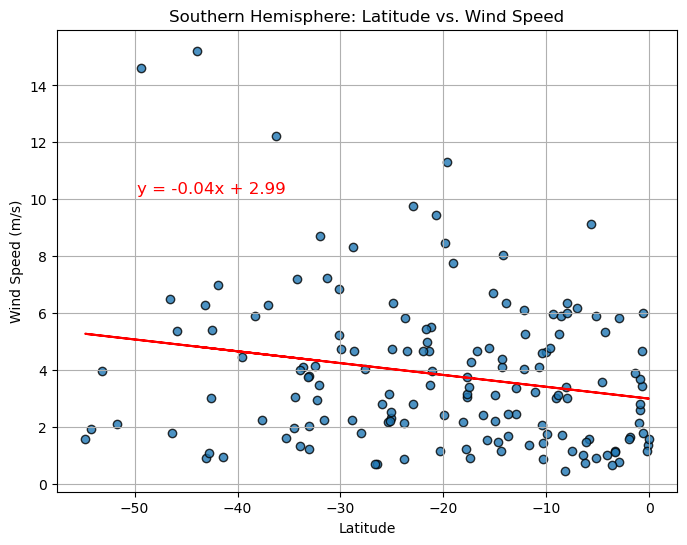

In [28]:
# Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Southern Hemisphere data (Latitude vs Wind Speed)
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope_south, intercept_south, r_value_south, p_value_south, std_err_south) = linregress(x_values_south, y_values_south)

# Create the linear regression line values for the Southern Hemisphere
regress_values_south = slope_south * x_values_south + intercept_south
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}"

# Plot the data and the regression line for Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(x_values_south, y_values_south, edgecolor="black", linewidths=1, alpha=0.8)
plt.plot(x_values_south, regress_values_south, color="red")

# Add the linear regression equation and R-squared value to the plot
plt.annotate(line_eq_south, (x_values_south.min() + 5, y_values_south.max() - 5), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.grid(True)

# Show the R-squared value in the console for Southern Hemisphere
print(f"Southern Hemisphere - r² = {r_value_south**2:.4f}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
## there is not a strong relationship be displayed here and overall disapointing look at the data. i would love to look at more data involving altitude and its relation to some of the more currious like humidity to see more of a relationship